In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# 1. Data Preprocessing
## 1.1 Fill Null Values
### 1.1.1 Find Null Values
Of 12 columns, 5 columns have missing values.

In [6]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
# which columns contain null values?
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print( i,'column:','{:.2%}'.format(df[i].isnull().sum()/len(df)),'of missing data')

director column: 30.68% of missing data
cast column: 9.22% of missing data
country column: 6.51% of missing data
date_added column: 0.13% of missing data
rating column: 0.09% of missing data


### 1.1.2 Fill/Drop Null Values
It can lead to missleading results by filling director column and cast column, so the best practice is to leave it as it is.

For country, let's fill with mode.
For other missing values, we decide to drop these rows.

After finished, check whether null values exist in table.

In [7]:
# value editing
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace = True)
df['director'].replace(np.nan, 'No Data', inplace = True)
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
# check if we are done
for i in df.columns:
    if df[i].isnull().sum() == 0:
        print( i,'column:','{:.2%}'.format(df[i].isnull().sum()/len(df)),'of missing data')

show_id column: 0.00% of missing data
type column: 0.00% of missing data
title column: 0.00% of missing data
director column: 0.00% of missing data
cast column: 0.00% of missing data
country column: 0.00% of missing data
date_added column: 0.00% of missing data
release_year column: 0.00% of missing data
rating column: 0.00% of missing data
duration column: 0.00% of missing data
listed_in column: 0.00% of missing data
description column: 0.00% of missing data


## 1.2 Feature Transformation
Not all data in the original table contains easy-to-read data, we want to transform them (create new columns) for audiences to understand data better.
### 1.2.1 Transform date_added column to desired dtype

In [8]:
import datetime as dt
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

### 1.2.2 Transfrom country to clean data

In [9]:
# Some entries in country column contains multiple countries, so we create a new column by putting only the first country name as the country of production.
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

### 1.2.3 Transform ratings to readable data

In [10]:
df['target_ages'] = df['rating'].replace({
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
})

### 1.2.4 Transform listed_in to readable data

In [11]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))

### 1.2.5 Transform country name, make them shorter for better visualization results

In [12]:
df['first_country'].replace({'United States': 'U.S.', 'United Kingdom':'UK', 'South Korea': 'S. Korea'}, inplace = True)

# 2. Visualization Preparation
matplotlib and seaborn are 2 primary packages we'll be using for visualization. We also figured out the Netflix color.

In [13]:
# import packages that we'll be using
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines

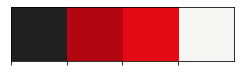

In [14]:
# here's the netflix color
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

# Visualization
## Segmentation by Market: Which Countries have most Netflix Subscribers?
One view of Netflix's business is to analyze it by country: in which countries Netflix has gained substantial customer base?
- underlying assumption: significant positive correlation between available content and paid subscribers.

In [15]:
df['count'] = 1
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


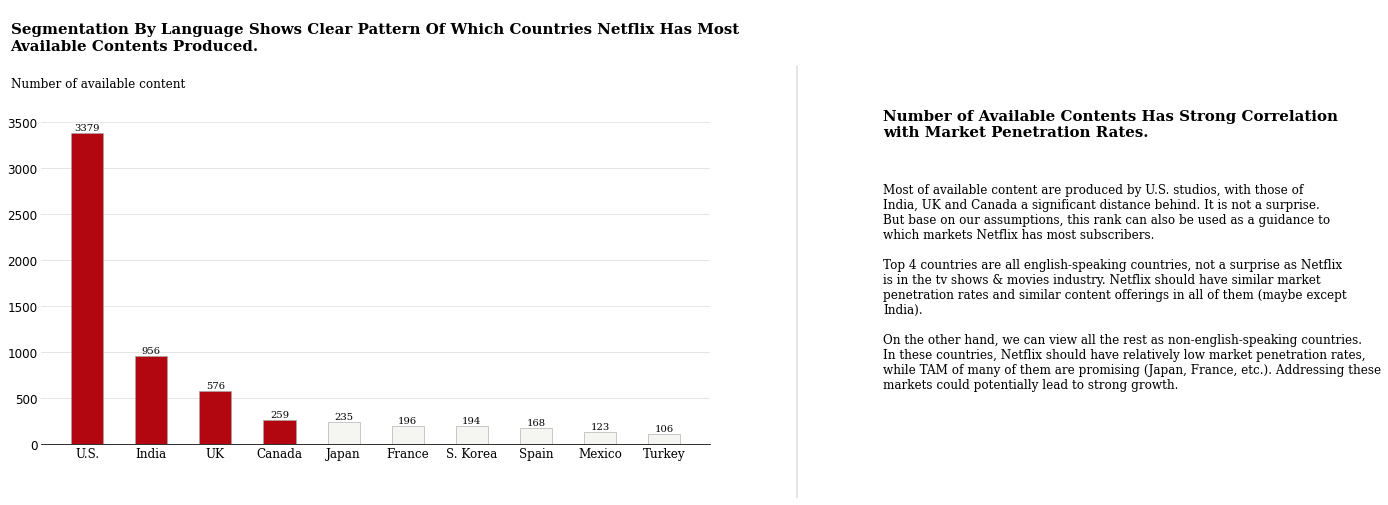

In [116]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = '#b20710'
# since we're plotting one graph, assign nrows and ncols = 1. fig size det
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize=(12, 6))
# plot the bar graph
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)
# plot annotations of # of productions.
for i in data.index:
    ax.annotate(data[i], xy=(i, data[i] + 60),
                va = 'center', ha='center',fontweight='light', fontfamily='serif')
# remove borders
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
# set xtick labels
ax.set_xticklabels(data.index, fontfamily='serif')
# add texts (sentences and paragraphs)
fig.text(0.09, 1, '''
Segmentation By Language Shows Clear Pattern Of Which Countries Netflix Has Most 
Available Contents Produced.
''', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Number of available content', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.1, 0.8, '''
Number of Available Contents Has Strong Correlation 
with Market Penetration Rates.
''', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.15, '''

Most of available content are produced by U.S. studios, with those of 
India, UK and Canada a significant distance behind. It is not a surprise. 
But base on our assumptions, this rank can also be used as a guidance to 
which markets Netflix has most subscribers.

Top 4 countries are all english-speaking countries, not a surprise as Netflix 
is in the tv shows & movies industry. Netflix should have similar market 
penetration rates and similar content offerings in all of them (maybe except 
India).

On the other hand, we can view all the rest as non-english-speaking countries.
In these countries, Netflix should have relatively low market penetration rates,
while TAM of many of them are promising (Japan, France, etc.). Addressing these
markets could potentially lead to strong growth.


'''
         , fontsize=12, fontweight='light', fontfamily='serif')
# add gridlines, set ticks
ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
# make ticks disappear, while setting labels to size 12
ax.tick_params(axis='both', which='major', labelsize=12, length = 0)
# finally, add a line as content separater
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

Text(0.17, 0.35, 'U.S.')

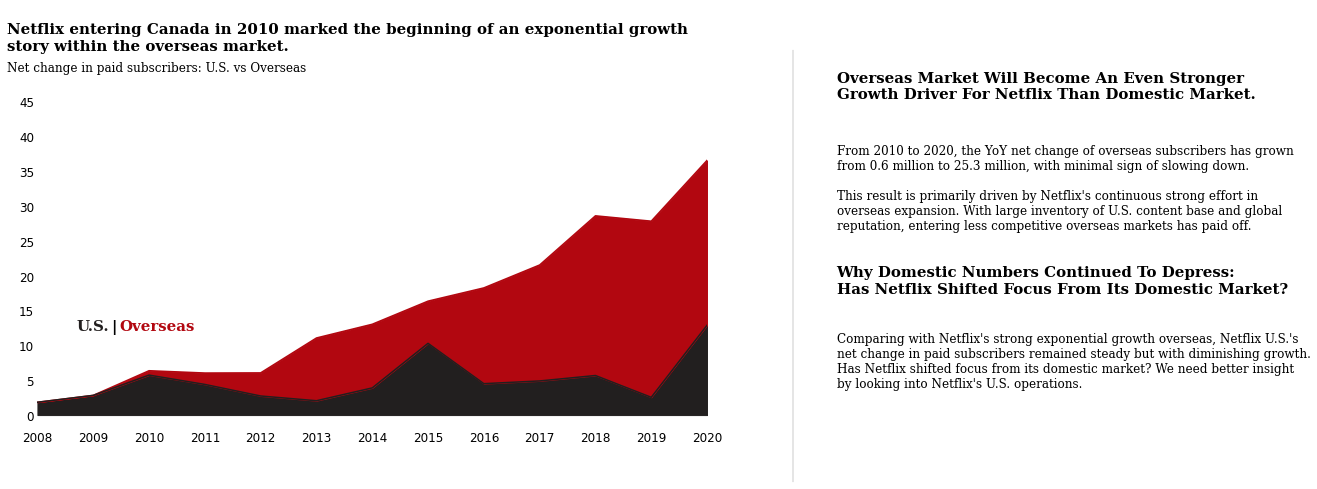

In [112]:
# let's get some subscriber data from web-search
total_subscribers_netchange = [1.84,2.83,6.37,6.04,6.06,11.07,13.04,16.36,18.26,21.55,28.61,27.84,36.57]
us_subscribers_netchange = [1.84,2.83,5.74,4.4,2.74,2.06,3.9,10.3,4.51,4.9,5.68,2.55,12.9]
yr = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
# let's visualize
fig,ax = plt.subplots(1,1,figsize = (12,6))
ax.plot(yr,total_subscribers_netchange, color = '#b20710')
ax.plot(yr,us_subscribers_netchange, color = '#221f1f')
# fill things up
ax.fill_between(yr,us_subscribers_netchange,color = '#221f1f')
ax.fill_between(yr,y1 = total_subscribers_netchange, y2 = us_subscribers_netchange, color = '#b20710')
# remove border
for s in ['top', 'left', 'right','bottom']:
    ax.spines[s].set_visible(False)   
# edit ticks 
ax_xticks = np.arange(2008, 2021, 1)
ax.set_xticks(ax_xticks)
ax.set_xlim(2008,2020)
ax_yticks = np.arange(0,50,5)
ax.set_yticks(ax_yticks)
ax.tick_params(axis='both', which='major', labelsize=12, length = 0)
# Add title
fig.text(0.09, 1, '''
Netflix entering Canada in 2010 marked the beginning of an exponential growth 
story within the overseas market.''', 
         fontsize=15, fontweight='bold', fontfamily='serif')
# opening statement
fig.text(0.09, 0.95, 'Net change in paid subscribers: U.S. vs Overseas', fontsize=12, fontweight='light', fontfamily='serif')
# add line separater
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])
# Insights Part
fig.text(1.05, 0.85, """
Overseas Market Will Become An Even Stronger 
Growth Driver For Netflix Than Domestic Market.
""", fontsize=15, fontweight='bold', fontfamily='serif')
# Insights Part
fig.text(1.05, 0.4, """
Why Domestic Numbers Continued To Depress: 
Has Netflix Shifted Focus From Its Domestic Market?
""", fontsize=15, fontweight='bold', fontfamily='serif')
# write some texts
fig.text(1.05, 0.55, 
'''
From 2010 to 2020, the YoY net change of overseas subscribers has grown 
from 0.6 million to 25.3 million, with minimal sign of slowing down.

This result is primarily driven by Netflix's continuous strong effort in 
overseas expansion. With large inventory of U.S. content base and global 
reputation, entering less competitive overseas markets has paid off.
'''
       , fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.05, 0.22, 
'''
Comparing with Netflix's strong exponential growth overseas, Netflix U.S.'s 
net change in paid subscribers remained steady but with diminishing growth.
Has Netflix shifted focus from its domestic market? We need better insight
by looking into Netflix's U.S. operations.'''
         , fontsize=12, fontweight='light', fontfamily='serif')
# beautiful legends
fig.text(0.22,0.35,"Overseas", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.21,0.35,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.17,0.35,"U.S.", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

## Let's get a closer look at Netflix U.S.

Text(1.05, 0.55, '\nAmazon Prime Videos, Hulu, Disney+ and others deployed more aggressive \ncustomer acquisition strategies than during pre-covid periods, including\nmoving newly-released films from exclusive movie theatres offerings\nto their streaming services.\n')

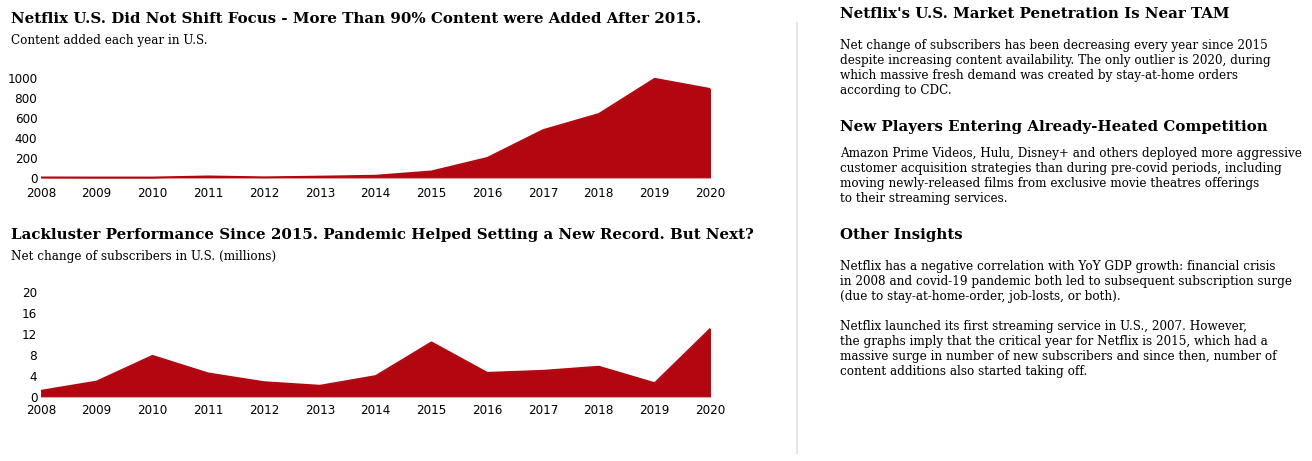

In [81]:
# let's get some subscriber data from web-search
us_subscribers_netchange = [1.1,2.86,7.74,4.4,2.74,2.06,3.9,10.3,4.51,4.9,5.68,2.55,12.9]
yr = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
# some data manipulations here
us = df[df['first_country'] == 'U.S.']
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)
plt.subplots_adjust(hspace = 1)
us_eachyear = us.groupby('year_added')['count'].sum()

# let's visualize ax
ax.plot(us_eachyear.index,us_eachyear, color = '#b20710')
# fill with netflix color
ax.fill_between(us_eachyear.index, us_eachyear,color = '#b20710')
# let's visualize ax1
ax1.plot(yr,us_subscribers_netchange,color = '#b20710')
ax1.fill_between(yr, us_subscribers_netchange,color = '#b20710')
# remove borders
for s in ['top', 'left', 'right','bottom']:
    ax.spines[s].set_visible(False)
for s in ['top', 'left', 'right','bottom']:
    ax1.spines[s].set_visible(False)    
# edit ticks 
ax_xticks = np.arange(2008, 2021, 1)
ax.set_xticks(ax_xticks)
ax.set_xlim(2008,2020)
ax_yticks = np.arange(0,1001,200)
ax.set_yticks(ax_yticks)
ax.tick_params(axis='both', which='major', labelsize=12, length = 0)
ax1_xticks = np.arange(2008, 2021, 1)
ax1.set_xticks(ax_xticks)
ax1.set_xlim(2008,2020)
ax1_yticks = np.arange(0,21,4)
ax1.set_yticks(ax1_yticks)
ax1.tick_params(axis='both', which='major', labelsize=12, length = 0)

# Add title
fig.text(0.09, 1, 'Netflix U.S. Did Not Shift Focus - More Than 90% Content were Added After 2015.', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.5, 'Lackluster Performance Since 2015. Pandemic Helped Setting a New Record. But Next?', fontsize=15, fontweight='bold', fontfamily='serif')
# Statement
fig.text(0.09, 0.95, 'Content added each year in U.S.', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.09, 0.45, 'Net change of subscribers in U.S. (millions)', fontsize=12, fontweight='light', fontfamily='serif')
# add line separater
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.2)
fig.lines.extend([l1])
# Insights Part
fig.text(1.05, 1.01, "Netflix's U.S. Market Penetration Is Near TAM", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.05, 0.75, "New Players Entering Already-Heated Competition ", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.05, 0.5, "Other Insights", fontsize=15, fontweight='bold', fontfamily='serif')
# write some texts
fig.text(1.05, 0.15, 
'''
Netflix has a negative correlation with YoY GDP growth: financial crisis 
in 2008 and covid-19 pandemic both led to subsequent subscription surge 
(due to stay-at-home-order, job-losts, or both).

Netflix launched its first streaming service in U.S., 2007. However, 
the graphs imply that the critical year for Netflix is 2015, which had a 
massive surge in number of new subscribers and since then, number of 
content additions also started taking off.
'''
       , fontsize=12, fontweight='light', fontfamily='serif')
# write some texts
fig.text(1.05, 0.8, 
'''
Net change of subscribers has been decreasing every year since 2015 
despite increasing content availability. The only outlier is 2020, during 
which massive fresh demand was created by stay-at-home orders 
according to CDC.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
# write some texts
fig.text(1.05, 0.55, 
'''
Amazon Prime Videos, Hulu, Disney+ and others deployed more aggressive 
customer acquisition strategies than during pre-covid periods, including
moving newly-released films from exclusive movie theatres offerings
to their streaming services.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
